In [1]:
"""
不能识别的时候新建环境就行,不想新建就只有下面复杂的方法了
"""
# # mamba install -c conda-forge python boost scipy numpy expat cgal 
# # # !mamba install schist graph-tool -y
# mamba install -c conda-forge python boost scipy numpy expat cgal
# mamba install -c conda-forge sparsehash
# mamba install -c conda-forge cairomm matplotlib
# conda install -c conda-forge pygobject
# pycairo
# export CPLUS_INCLUDE_PATH="/home/fanxi/mambaforge/envs/rbaby/include:${CPLUS_INCLUDE_PATH}"

# ./configure --prefix=/home/fanxi/mambaforge/envs/rbaby/ \
#     --with-python-module-path=/home/fanxi/mambaforge/envs/rbaby/lib/python3.9/site-packages \
#     --with-boost=/home/fanxi/mambaforge/envs/rbaby/include/boost  \
#     --with-boost-libdir=/home/fanxi/mambaforge/envs/rbaby/lib \
#     --with-cgal=/home/fanxi/mambaforge/envs/rbaby/include/CGAL
    
# # export PKG_CONFIG_PATH=/home/fanxi/mambaforge/envs/rbaby/lib/pkgconfig:$PKG_CONFIG_PATH
# make -j50
# make install
# # --with-boost=/path/to/boost

In [1]:
import scanpy as sc
import schist

In [2]:
adata = sc.read_h5ad("anndata_celltypist_anno.h5ad")

In [4]:
"""
重新计算嵌入是有意义的
"""
# use logcounts to calculate PCA and neighbors
adata.layers["logcounts"] = sc.pp.log1p(adata.layers["counts"]).copy()
adata.X = adata.layers["logcounts"].copy()
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30, random_state=123)

# Calculate UMAP for visualization purposes
sc.tl.umap(adata, random_state=123)

 Then, we can run schist on the AnnData object, which results in a clustering that is defined through a set of columns "nsbm_level_{i}" in `adata.obs`:

In [5]:
"""
除了每种细胞类型的丰度之外，还以基于树的分层排序的形式包含有关不同细胞相似性的信息。
这些层次结构可以通过基因表达的聚类（通常用于发现属于同一细胞类型的细胞簇）自动确定，
也可以通过生物信息层次结构（如细胞谱系）自动确定
-----------------------------------------------
它使用嵌套随机块模型，以不同的分辨率级别对细胞群进行聚类。
使用标准设置运行该方法需要一些时间15min+

-----------------------------------------------
这会产生通过以下中的一组列“nsbm_level_{i}”定义的聚类结果：
"""
schist.inference.nested_model(adata, random_seed=123)
adata.obs

Switching to loky backend


,Barcode,batch,sample,group,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_in_top_50_genes,...,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine,nsbm_level_0,nsbm_level_1,nsbm_level_2,nsbm_level_3,nsbm_level_4,nsbm_level_5,nsbm_level_6
AAACCCACAGGATTCT-1_GSM7847141_diac44a_filtered_feature_bc_matrix.h5,AAACCCACAGGATTCT-1,GSM7847141,diac44a,Non-diabetic,3323,8.108924,12617.0,9.442880,17.650789,32.012364,...,0.985352,Epithelial cells,0.909870,0,0,0,0,0,0,0
AAACCCAGTCTAACTG-1_GSM7847141_diac44a_filtered_feature_bc_matrix.h5,AAACCCAGTCTAACTG-1,GSM7847141,diac44a,Non-diabetic,1563,7.355002,3456.0,8.148156,23.003472,33.449074,...,0.998616,Epithelial cells,0.996387,179,16,1,0,0,0,0
AAACCCATCAGAGCGA-1_GSM7847141_diac44a_filtered_feature_bc_matrix.h5,AAACCCATCAGAGCGA-1,GSM7847141,diac44a,Non-diabetic,2353,7.763871,8597.0,9.059285,20.728161,38.385483,...,0.997049,Epithelial cells,0.996822,2,19,2,0,0,0,0
AAACCCATCATACGAC-1_GSM7847141_diac44a_filtered_feature_bc_matrix.h5,AAACCCATCATACGAC-1,GSM7847141,diac44a,Non-diabetic,1988,7.595387,7188.0,8.880307,23.135782,41.318865,...,0.994027,Epithelial cells,0.990814,3,15,1,0,0,0,0
AAACGAAGTCCTCCTA-1_GSM7847141_diac44a_filtered_feature_bc_matrix.h5,AAACGAAGTCCTCCTA-1,GSM7847141,diac44a,Non-diabetic,1137,7.037028,2030.0,7.616283,20.788177,29.753695,...,0.001567,Fibroblasts,0.000197,305,4,3,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCTGGAAGG-1_GSM7847134_diac32_filtered_feature_bc_matrix.h5,TTTGGTTTCTGGAAGG-1,GSM7847134,diac32,Diabetic,3902,8.269501,23204.0,10.052123,25.762800,43.208068,...,0.729171,Epithelial cells,0.654593,125,24,2,0,0,0,0
TTTGTTGCACATATGC-1_GSM7847134_diac32_filtered_feature_bc_matrix.h5,TTTGTTGCACATATGC-1,GSM7847134,diac32,Diabetic,3346,8.115820,14191.0,9.560433,27.503347,40.286097,...,0.716347,Epithelial cells,0.426101,117,29,10,4,0,0,0
TTTGTTGCAGAAGTTA-1_GSM7847134_diac32_filtered_feature_bc_matrix.h5,TTTGTTGCAGAAGTTA-1,GSM7847134,diac32,Diabetic,3758,8.231908,18570.0,9.829356,25.729672,39.886914,...,0.995304,Epithelial cells,0.996266,122,31,1,0,0,0,0
TTTGTTGGTTTGGGAG-1_GSM7847134_diac32_filtered_feature_bc_matrix.h5,TTTGTTGGTTTGGGAG-1,GSM7847134,diac32,Diabetic,2791,7.934513,14053.0,9.550662,24.557034,43.214972,...,0.001310,Epithelial cells,0.047285,93,20,1,0,0,0,0


/home/fanxi/mambaforge/envs/schist/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/mambaforge/envs/schist/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/fanxi/mambaforge/envs/schist/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.ma

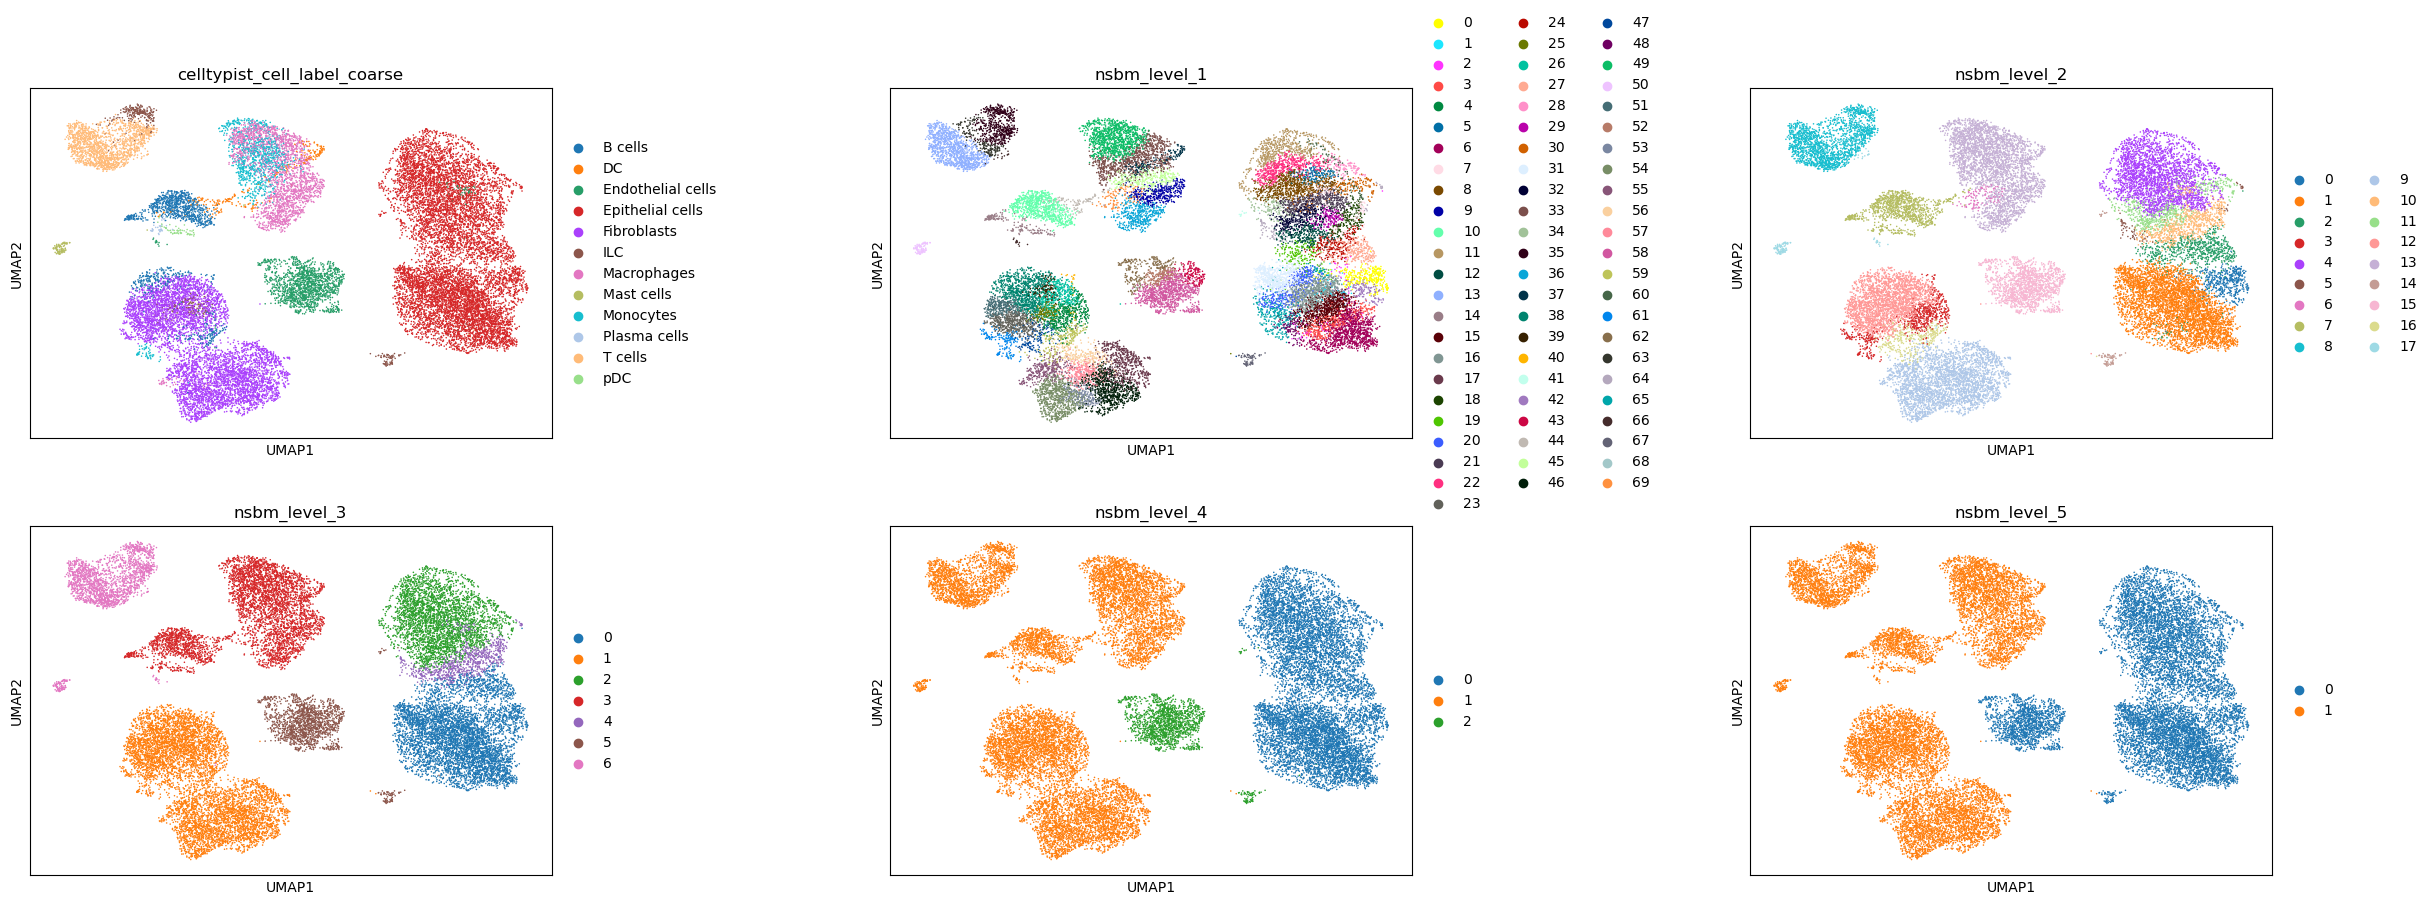

In [6]:
"""
UMAP 图很好地显示了片岩(schist)的聚类如何与细胞类型分配相关联。
"""
sc.pl.umap(
    adata,
    color=[
        "celltypist_cell_label_coarse",
        "nsbm_level_1",
        "nsbm_level_2",
        "nsbm_level_3",
        "nsbm_level_4",
        "nsbm_level_5",
    ],
    ncols=3,
    wspace=0.5,
)

 Now, we convert our cell-level data to sample-level data and create the tree. We create a tasccoda_model object in the same way as for scCODA, but with the clustering defined by schist and tree levels.

 The load function of Tasccoda will prepare a MuData object and it converts our tree representation into a [ete](http://etetoolkit.org/) tree structure and save it as `tasccoda_data['coda'].uns["tree"]`. To get some clusters that are not too small, we cut the tree before the last level by leaving out `"nsbm_level_0"`.

In [7]:
## 保存schist结果
adata.write_h5ad("anndata_schist_ing.h5ad")

In [1]:
""" 
在这里更换环境为back
"""
import scanpy as sc

adata = sc.read_h5ad("anndata_schist_ing.h5ad")

In [2]:
"""
pertpy和schist有版本冲突，这里切换到back环境
"""
import pertpy as pt

tasccoda_model = pt.tl.Tasccoda()
tasccoda_data = tasccoda_model.load(
    adata,
    type="cell_level",
    cell_type_identifier="nsbm_level_1",
    sample_identifier="batch",
    covariate_obs=["group"],
    levels_orig=["nsbm_level_4", "nsbm_level_3", "nsbm_level_2", "nsbm_level_1"],
    add_level_name=True,
)
tasccoda_data

MuData object with n_obs × n_vars = 24025 × 5070
  var:	'n_cells'
  2 modalities
    rna:	24013 x 5000
      obs:	'Barcode', 'batch', 'sample', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'discard', 'n_genes', 'doublet_score', 'predicted_doublet', 'size_factors', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_2', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'nsbm_level_0', 'nsbm_level_1', 'nsbm_level_2', 'nsbm_level_3', 'nsbm_level_4', 'nsbm_level_5', 'nsbm_level_6', 'scCODA_sample_id'
      var:	'gene_ids', 'feature_types', 'genome', 'gene_names', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'celltypist_cell_label_coarse_colors', 'celltypist_cell_label_fine_colors', 'group_colors', 'hvg', 'leiden', 'leiden_0_25_colors', 'leiden_0_5_colors', 'leiden_2_colors', 'leiden_colors', 'neighbors', 'nsbm_level_1_colors', 'nsbm_level_2_colors', 'nsbm_level_3_colors', 'nsbm_level_4_colors', 'nsbm_level_5_colors', 'pca', 'sample_colors', 'schist', 'scrublet', 'tsne', 'umap'
      obsm:	'CM_nsbm_level_0', 'CM_nsbm_level_1', 'CM_nsbm_level_2', 'CM_nsbm_level_3', 'CM_nsbm_level_4', 'CM_nsbm_level_5', 'CM_nsbm_level_6', 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'logcounts', 'scran_normalization', 'soupX_counts'
      obsp:	'connectivities', 'distances'
    coda:	12 x 70
      obs:	'group', 'batch'
      var:	'n_cells'
      uns:	'tree'

In [3]:
import ete3

In [4]:
# TODO：暂未解决：绘图内核都会崩溃
pt.pl.coda.draw_tree(
    tasccoda_data,
    show=True,
                     )

(Tree node '' (0x7f6c6d01b4f),
 <ete3.treeview.main.TreeStyle at 0x7f70feb33250>)

 The model setup and execution in tascCODA works analogous to scCODA, and also the free parameters for the reference and the formula are the same. Additionally, we can adjust the tree aggregation and model selection via the parameters `phi` and `lambda_1` in the `pen_args` argument (see {cite}Ostner2021 for more information). Here, we use an unbiased setting `phi=0` and a model selection that is slightly less strict than the default with `lambda_1=1.7`. We use cluster 18 as our reference, since it is almost identical to the set of Endocrine cells.

In [5]:
tasccoda_model.prepare(
    tasccoda_data,
    modality_key="coda",
    # reference_cell_type="18",
    formula="group",
    pen_args={"phi": 0, "lambda_1": 3.5},
    tree_key="tree",
)

Automatic reference selection! Reference cell type set to 37

Zero counts encountered in data! Added a pseudocount of 0.5.

MuData object with n_obs × n_vars = 24025 × 5070
  var:	'n_cells'
  2 modalities
    rna:	24013 x 5000
      obs:	'Barcode', 'batch', 'sample', 'group', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'discard', 'n_genes', 'doublet_score', 'predicted_doublet', 'size_factors', 'leiden', 'leiden_0_25', 'leiden_0_5', 'leiden_2', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'nsbm_level_0', 'nsbm_level_1', 'nsbm_level_2', 'nsbm_level_3', 'nsbm_level_4', 'nsbm_level_5', 'nsbm_level_6', 'scCODA_sample_id'
      var:	'gene_ids', 'feature_types', 'genome', 'gene_names', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'celltypist_cell_label_coarse_colors', 'celltypist_cell_label_fine_colors', 'group_colors', 'hvg', 'leiden', 'leiden_0_25_colors', 'leiden_0_5_colors', 'leiden_2_colors', 'leiden_colors', 'neighbors', 'nsbm_level_1_colors', 'nsbm_level_2_colors', 'nsbm_level_3_colors', 'nsbm_level_4_colors', 'nsbm_level_5_colors', 'pca', 'sample_colors', 'schist', 'scrublet', 'tsne', 'umap'
      obsm:	'CM_nsbm_level_0', 'CM_nsbm_level_1', 'CM_nsbm_level_2', 'CM_nsbm_level_3', 'CM_nsbm_level_4', 'CM_nsbm_level_5', 'CM_nsbm_level_6', 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'logcounts', 'scran_normalization', 'soupX_counts'
      obsp:	'connectivities', 'distances'
    coda:	12 x 70
      obs:	'group', 'batch'
      var:	'n_cells'
      uns:	'tree', 'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'

In [6]:
tasccoda_model.run_nuts(
    tasccoda_data, modality_key="coda", rng_key=1234, num_samples=10000, num_warmup=1000
)

sample: 100%|██████████| 11000/11000 [04:14<00:00, 43.25it/s, 31 steps of size 1.18e-01. acc. prob=0.92]


In [7]:
tasccoda_model.summary(tasccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 12 samples, 70 cell types                                    │
│ Reference cell type                        │ 37                                                                 │
│ Formula                                    │ group                                                              │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│            Final Parameter  Expected Sample                                                                     │
│ Cell Type                                                                                                       │
│ 0              -0.751           26.200                                                                          │
│ 1              -1.457           12.933                                                                          │
│ 2              -1.325           14.758                                                                          │
│ 3              -0.801           24.922                                                                          │
│ 4              -0.294           41.379                                                                          │
│ 5              -1.250           15.907                                                                          │
│ 6              -0.597           30.562                                                                          │
│ 7              -1.068           19.082                                                                          │
│ 8              -0.500           33.675                                                                          │
│ 9              -0.641           29.247                                                                          │
│ 10             -0.800           24.947                                                                          │
│ 11             -0.735           26.623                                                                          │
│ 12             -0.886           22.892                                                                          │
│ 13              0.044           58.019                                                                          │
│ 14             -0.751           26.200                                                                          │
│ 15             -0.655           28.840                                                                          │
│ 16             -0.621           29.838                                                                          │
│ 17             -0.277           42.088                                                                          │
│ 18             -1.154           17.510                                                                          │
│ 19             -0.968           21.089                                                                          │
│ 20             -0.846           23.826                                                                          │
│ 21             -0.716           27.133                                                                          │
│ 22             -0.609           30.198                                                                          │
│ 23             -0.136           48.461                                                                          │
│ 24             -1.015           20.121                                                                          │
│ 25             -0.714           27.188                                                                          │
│ 26             -0.358           38.814                                                                          │
│ 27             -0.960           21.259                                                                          │
│ 28             -1.341           14.524                                                                          │
│ 29             -1.207           16.606                

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                Effect  Expected Sample  log2-fold change                                        │
│ Covariate           Cell Type                                                                                   │
│ groupT.Non-diabetic 0          0.000       26.200            0.000                                              │
│                     1          0.000       12.933            0.000                                              │
│                     2          0.000       14.758            0.000                                              │
│                     3          0.000       24.922            0.000                                              │
│                     4          0.000       41.379            0.000                                              │
│                     5          0.000       15.907            0.000                                              │
│                     6          0.000       30.562            0.000                                              │
│                     7          0.000       19.082            0.000                                              │
│                     8          0.000       33.675            0.000                                              │
│                     9          0.000       29.247            0.000                                              │
│                     10         0.000       24.947            0.000                                              │
│                     11         0.000       26.623            0.000                                              │
│                     12         0.000       22.892            0.000                                              │
│                     13         0.000       58.019            0.000                                              │
│                     14         0.000       26.200            0.000                                              │
│                     15         0.000       28.840            0.000                                              │
│                     16         0.000       29.838            0.000                                              │
│                     17         0.000       42.088            0.000                                              │
│                     18         0.000       17.510            0.000                                              │
│                     19         0.000       21.089            0.000                                              │
│                     20         0.000       23.826            0.000                                              │
│                     21         0.000       27.133            0.000                                              │
│                     22         0.000       30.198            0.000                                              │
│                     23         0.000       48.461            0.000                                              │
│                     24         0.000       20.121            0.000                                              │
│                     25         0.000       27.188            0.000                                              │
│                     26         0.000       38.814            0.000                                              │
│                     27         0.000       21.259            0.000                                              │
│                     28         0.000       14.524            0.000                                              │
│                     29         0.000       16.606     

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Nodes                                                                                                           │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Covariate=group[T.Non-diabetic]_node                                                                            │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                  Final Parameter  Is credible                                                                   │
│ Node                                                                                                            │
│ nsbm_level_4_0        0.00           False                                                                      │
│ nsbm_level_4_1        0.00           False                                                                      │
│ nsbm_level_3_5        0.00           False                                                                      │
│ nsbm_level_3_0        0.00           False                                                                      │
│ nsbm_level_3_2        0.00           False                                                                      │
│ nsbm_level_3_4        0.00           False                                                                      │
│ nsbm_level_3_1        0.00           False                                                                      │
│ nsbm_level_3_3        0.00           False                                                                      │
│ nsbm_level_3_6        0.00           False                                                                      │
│ nsbm_level_2_14       0.00           False                                                                      │
│ nsbm_level_2_15       0.00           False                                                                      │
│ nsbm_level_2_0        0.00           False                                                                      │
│ nsbm_level_2_1        0.00           False                                                                      │
│ nsbm_level_2_2        0.00           False                                                                      │
│ nsbm_level_2_4        0.00           False                                                                      │
│ nsbm_level_2_11       0.00           False                                                                      │
│ nsbm_level_2_10       0.00           False                                                                      │
│ 64                    0.00           False                                                                      │
│ nsbm_level_2_3        0.00           False                                                                      │
│ nsbm_level_2_9        0.00           False                                                                      │
│ nsbm_level_2_12       0.00           False                                                                      │
│ nsbm_level_2_16       0.00           False                                                                      │
│ nsbm_level_2_7        0.00           False                                                                      │
│ nsbm_level_2_13       0.00           False                                                                      │
│ 69                    0.00           False                                                                      │
│ nsbm_level_2_8        0.00           False                                                                      │
│ nsbm_level_2_17       0.00           False                                                                      │
│ 41                    0.00           False            

 Again, the acceptance probability is right around the desired value of 0.85 for tascCODA, indicating no apparent problems with the optimization.

 The result from tascCODA should first and foremost be interpreted as effects on the nodes of the tree. A nonzero parameter on a node means that the aggregated count of all cell types under that node changes significantly.
 We can easily visualize this in a tree plot for each of the three disease states. Blue circles indicate an increase, red circles a decrease:

In [8]:
pt.pl.coda.draw_effects(
    tasccoda_data,
    modality_key="coda",
    tree="tree",
    covariate="group[T.Non-diabetic]",
    show_leaf_effects=False,
    show_legend=False,
)

: 

In [ ]:
pt.pl.coda.draw_effects(
    tasccoda_data,
    modality_key="coda",
    tree="tree",
    covariate="condition[T.Hpoly.Day3]",
    show_leaf_effects=False,
    show_legend=False,
)

In [ ]:
pt.pl.coda.draw_effects(
    tasccoda_data,
    modality_key="coda",
    tree="tree",
    covariate="condition[T.Hpoly.Day10]",
    show_leaf_effects=False,
    show_legend=False,
)

: 

 Alternatively, effects on internal nodes can also be translated through the tree onto the cell type level, allowing for a calculation of log-fold changes like in scCODA.
 To visualize the log-fold changes of the cell types, we do the same plots as for scCODA, inspired by "High-resolution single-cell atlas reveals diversity and plasticity of tissue-resident neutrophils in non-small cell lung cancer"{cite}`Salcher2022`.

In [ ]:
pt.pl.coda.effects_barplot(tasccoda_data, modality_key="coda", covariates="condition")

: 

 Another insightful representation can be gained by plotting the effect sizes for each condition on the UMAP embedding, and comparing it to the cell type assignments:

In [ ]:
kwargs = {"ncols": 3, "wspace": 0.25, "vcenter": 0, "vmax": 1.5, "vmin": -1.5}
pt.pl.coda.effects_umap(
    tasccoda_data,
    effect_name=[
        "effect_df_condition[T.Salmonella]",
        "effect_df_condition[T.Hpoly.Day3]",
        "effect_df_condition[T.Hpoly.Day10]",
    ],
    cluster_key="nsbm_level_1",
    **kwargs
)
sc.pl.umap(
    tasccoda_data["rna"], color=["cell_label", "nsbm_level_1"], ncols=2, wspace=0.5
)

: 

 The results are very similar to scCODA's findings:
 - For the Salmonella infection, we get an aggregated increase in clusters that approximately represent Enterocytes in the cell type clustering. This increase is even stronger for cluster 12, as indicated by the additional positive effect on the leaf level
 - For the Heligmosomoides polygyrus infection, we get no credible changes after 3 days. After 10 days, we pick up decreases in clusters that contain Stem- and transit-amplifying cells, as well as a less strong decrease of Enterocytes and Enterocyte progenitors, which was also picked up by scCODA.

 ## Without labeled clusters

 It is not always possible or practical to use precisely labeled clusters such as cell-type definitions, especially when we are interested in studying transitional states between cell type clusters, such as during developmental processes, or when we expect only a subpopulation of a cell type to be affected by the condition of interest. In such cases, determining compositional changes based on known annotations may not be appropriate.

 A set of methods exist to detect compositional changes occuring in subpopulations of cells smaller than the cell type clusters, usually defined starting from a k-nearest neighbor (KNN) graph computed from similarities in the same low dimensional space used for clustering.

 - DA-seq computes, for each cell, a score based on the relative prevalence of cells from both biological states in the cell’s neighborhood, using a range of k values{cite}`Zhao2021`. The scores are used as input for a logistic classifier to predict the biological condition of each cell.
 - Milo assigns cells to partially overlapping neighborhoods on the KNN graph, then differential abundance (DA) testing is performed modelling cell counts witgh a generalized linear model (GLM) {cite}`Dann2022`.
 - MELD calculates a relative likelihood estimate of observing each cell in every condition using graph-based density estimate{cite}`Burkhardt2021`.

 These methods have unique strenghts and weaknesses. Because it relies on logistic classification, DA-seq is designed for pairwise comparisons between two biological conditions, but can't be applied to test for differences associated with a continuous covariate (such as age or timepoints). DA-seq and Milo use the variance in the abundance statistic between replicate samples of the same condition to estimate the significance of the differential abundance, while MELD doesn't use this information. While considering consistency across replicates reduces the number of false positives driven by one or a few samples, all KNN-based methods are sensitive to a loss of information if the conditions of interest and confounders, defined by technical or experimental sources of variation, are strongly correlated. The impact of confounders can be mitigated using batch integration methods before KNN graph construction and/or incorporating the confounding covariates in the model for DA testing, as we discuss further in the example below. Another limitation of KNN-based methods to bare in mind is that cells in a neighborhood may not necessarily represent a specific, unique biological subpopulation, because a cellular state may span over multiple neighborhoods. Reducing k for the KNN graph or constructing a graph on cells from a particular lineage of interest can help mitigate this issue and ensure the predicted effects are robust to the choice of parameters and to the data subset used{cite}`Dann2022`.

 Generally, if large differences are apparent in large clusters by visualization or the imbalances between cell types are of interest, direct analysis with cell-type aware methods, such as scCODA, might be more suitable. KNN-based methods are more powerful when we are interested in differences in cell abundances that might appear in transitional states between cell types or in a specific subset of cells of a given cell type.

 We will now apply Milo to the Haber dataset to try to find over- or underrepresented neighborhoods of cells upon infection.

 Milo is available as [miloR](https://github.com/MarioniLab/miloR) for R users and in [Pertpy](https://github.com/theislab/pertpy) for Python users in the scverse ecosystem. In the following demonstration, we will use milo which is easiest to use with our AnnData object due to its scverse compatibility. Be aware that milo in its current state also requires a working [edgeR](https://bioconductor.org/packages/release/bioc/html/edgeR.html) installation.

 To perform DA analysis with Milo, we need to construct a KNN graph that is representative of the biological similarities between cells, as we do when performing clustering or UMAP visualization of a single-cell dataset. This means (A) building a common low-dimensional space for all samples and (B) minimizing cell-cell similarities driven by technical factors (i.e. batch effects).

 We first use the standard scanpy workflow for dimensionality reduction to qualitatively assess whether we see a batch effect in this dataset.

In [ ]:
milo = pt.tl.Milo()
adata = pt.dt.haber_2017_regions()
mdata = milo.load(adata)
mdata

: 

In [ ]:
# use logcounts to calculate PCA and neighbors
adata.layers["counts"] = adata.X.copy()
adata.layers["logcounts"] = sc.pp.log1p(adata.layers["counts"]).copy()
adata.X = adata.layers["logcounts"].copy()

sc.pp.highly_variable_genes(
    adata, n_top_genes=3000, subset=False
)  # 3k genes as used by authors for clustering

sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

: 

In [ ]:
sc.pl.umap(adata, color=["condition", "batch", "cell_label"], ncols=3, wspace=0.25)

: 

 While cell type clusters are broadly captured, we can see residual separation between batches, also for replicates of the same treatment. If we define neighbourhoods on this KNN graph we might have a large fraction of neighbourhoods containing cells from just one or a few batches. This could introduce false negatives, if the variance in number of cells between replicates is too low (e.g. 0 cells for all replicates) or too high (e.g. all zero cells except for one replicate with a large number of cells), but also false positives, especially when, like in this case, the number of replicates per condition is low.

 To minimize these errors, we apply the scVI method to learn a batch-corrected latent space, as introduced in the [integration chapter]().

In [ ]:
import scvi

adata_scvi = adata[:, adata.var["highly_variable"]].copy()
scvi.model.SCVI.setup_anndata(adata_scvi, layer="counts", batch_key="batch")
model_scvi = scvi.model.SCVI(adata_scvi)
max_epochs_scvi = int(np.min([round((20000 / adata.n_obs) * 400), 400]))
model_scvi.train(max_epochs=max_epochs_scvi)
adata.obsm["X_scVI"] = model_scvi.get_latent_representation()

: 

In [ ]:
sc.pp.neighbors(adata, use_rep="X_scVI")
sc.tl.umap(adata)

: 

In [ ]:
sc.pl.umap(adata, color=["condition", "batch", "cell_label"], ncols=3, wspace=0.25)

: 

 Here we can see much better mixing between batches and cell labels form much more uniform clusters.

 ```{admonition} Will batch correction remove biological differences between conditions?

 This really boils down to good experimental design. In an ideal set-up replicates from the same condition will be processed in different batches. This allows to estimate technical differences more accurately and possibly also incorporate the batch as a confounder in the linear model for differential abundance analysis (see below), to further minimize false positives. When, like in this example, batches are confounded with the biological condition of interest, we have to recognize that while we might be minimizing false positives, the rate of false negatives might also increase. The analyst can decide which type of error is more detrimental depending on the dataset and purpose of the differential abundance analysis.
 ```

 ### Define neighbourhoods

 Milo is a KNN-based model, where cell abundance is quantified on neighbourhoods of cells. In Milo, a neighbourhood is defined as the group of cells connected by an edge to the same cell (_index cell_) in an undirected KNN graph. While we could in principle have one neighbourhood for each cell in the graph, this would be inefficient and significantly increase the multiple testing burden. Therefore Milo samples a refined set of cells as index cells for neighbourhoods, starting from a random sample of a fraction of cells. The initial proportion can be specified using the `prop` argument in the `milo.make_nhoods` function. As by default, we recommend using `prop=0.1` (10% of cells) and to reduce to 5% or 2% to increase scalability on large datasets (> 100k cells).

 If no `neighbors_key` parameter is specified, Milo uses the neighbours from `.obsp`. Therefore, ensure that `sc.pp.neighbors` was run on the correct representation, i.e. an integrated latent space if batch correction was required.

In [ ]:
milo.make_nhoods(mdata, prop=0.1)

: 

 Now the binary assignment of cells to neighbourhood is stored in `adata.obsm['nhoods']`. Here we can see that, as expected, the number of neighbourhoods should be less or equal to the number of cells in the graph times the `prop` parameter. In this case, less or equal than 984 neighbourhoods.

In [ ]:
adata.obsm["nhoods"]

: 

 At this point we need to check the median number of cells in each neighbourhood, to make sure the neighbourhoods contain enough cells to detect differences between samples

In [ ]:
nhood_size = adata.obsm["nhoods"].toarray().sum(0)
plt.hist(nhood_size, bins=20)
plt.xlabel("# cells in neighbourhood")
plt.ylabel("# neighbouthoods")

: 

In [ ]:
np.median(nhood_size)

: 

 We expect the minimum number of cells to be equal to the k parameter used during graph construction (k=10 in this case). To increase the statistical power for DA testing, we need a sufficient number of cells from all samples in the majority of the neighbourhoods. We can use the following rule of thumb: to have a median of 3 cells from each sample in a neighbourhood, the number of cells in a neighbourhood should be at least 3 times the number of samples. In this case, we have data from 10 samples. If we want to have on average 3 cells from each sample in a neighbourhood, the minimum number of cells should be 30.

 Based on the plot above, we have a large number of neighbourhoods with less than 30 cells, which could lead to an underpowered test. To solve this, we just need to recompute the KNN graph using `n_neighbors=30`. To distinguish this KNN graph used for neighbourhood-level DA analysis from the graph used for UMAP building, we will store this as a distinct graph in `adata.obsp`.

In [ ]:
sc.pp.neighbors(adata, n_neighbors=30, use_rep="X_scVI", key_added="milo")
milo.make_nhoods(mdata, neighbors_key="milo", prop=0.1)

: 

 Let's check that the distribution of neighbourhood sizes has shifted.

In [ ]:
nhood_size = adata.obsm["nhoods"].toarray().sum(0)
plt.hist(nhood_size, bins=20)
plt.xlabel("# cells in neighbourhood")
plt.ylabel("# neighbouthoods")

: 

 ### Count cells in neighbourhoods

 In the next step, Milo counts cells belonging to each of the samples (here identified by the `batch` column in `adata.obs`).

In [ ]:
milo.count_nhoods(mdata, sample_col="batch")

: 

 This stores a neighbourhood-level AnnData object, where `nhood_adata.X` stores the number of cells from each sample in each neighbourhood

In [ ]:
mdata["milo"]

: 

 We can verify that the average number of cells per sample times the number of samples roughly corresponds to the number of cells in a neighbourhood.

In [ ]:
mean_n_cells = mdata["milo"].X.toarray().mean(0)
plt.plot(nhood_size, mean_n_cells, ".")
plt.xlabel("# cells in nhood")
plt.ylabel("Mean # cells per sample in nhood")

: 

 ### Run differential abundance test on neighbourhoods

 Milo uses edgeR's QLF test to test if there are statistically significant differences between the number of cells from a condition of interest in each neighborhood.

 Here we are interested in detecting in which neighbourhoods there is a significant increase or decrease of cells in response to infection. Since the `condition` covariate stores many different types of infection, we need to specify which conditions we need to contrast in our differential abundance test (following a convention used in R, by default the last level of the covariate against the rest will be used, in this case Salmonella vs rest). To specify the comparison, we use [the syntax used for GLMs in R](https://genomicsclass.github.io/book/pages/expressing_design_formula.html).

 Let's first test for differences associated with Salmonella infection.

In [ ]:
milo.da_nhoods(
    mdata, design="~condition", model_contrasts="conditionSalmonella-conditionControl"
)
milo_results_salmonella = mdata["milo"].obs.copy()
milo_results_salmonella

: 

 For each neighbourhood, we calculate a set of statistics. The most important ones to understand are:
 - **log-Fold Change (logFC):** this represents the effect size of the difference in cell abundance and corresponds to the coefficient associated with the condition of interest in the GLM. If logFC > 0 the neighbourhood is enriched in cells from the condition of interest, if logFC < 0 the neighbourhood is depleted in cells from the condition of interest.
 - **Uncorrected p-value (PValue):** this is the p-value for the QLF test before multiple testing correction
 - **SpatialFDR:** this is the p-value adjusted for multiple testing to limit the false discovery rate. This is calculated adapting the weighted Benjamini-Hochberg (BH) correction introduced by Lun et al {cite}`lun2017`, which accounts for the fact that because neighbourhoods are partially overlapping (i.e. one cell can belong to multiple neighbourhoods) the DA tests on different neighbourhoods are not completely independent. In practice, the BH correction is weighted by the reciprocal of the distance to the k-th nearest neighbor to the index cell (stored in `kth_distance`), which is used as a proxy for the amount of overlap with other neighbourhoods. You might notice that the SpatialFDR values are always lower or equal to the FDR values, calculated with a conventional BH correction.

 Before any exploration and interpretation of the results, we can visualize these statistics with a set of diagnostics plots to sanity check our statistical test:

In [ ]:
def plot_milo_diagnostics(mdata):
    alpha = 0.1  ## significance threshold

    with matplotlib.rc_context({"figure.figsize": [12, 12]}):

        ## Check P-value histogram
        plt.subplot(2, 2, 1)
        plt.hist(mdata["milo"].var["PValue"], bins=20)
        plt.xlabel("Uncorrected P-value")

        ## Visualize extent of multiple-testing correction
        plt.subplot(2, 2, 2)
        plt.scatter(
            mdata["milo"].var["PValue"],
            mdata["milo"].var["SpatialFDR"],
            s=3,
        )
        plt.xlabel("Uncorrected P-value")
        plt.ylabel("SpatialFDR")

        ## Visualize volcano plot
        plt.subplot(2, 2, 3)
        plt.scatter(
            mdata["milo"].var["logFC"],
            -np.log10(mdata["milo"].var["SpatialFDR"]),
            s=3,
        )
        plt.axhline(
            y=-np.log10(alpha),
            color="red",
            linewidth=1,
            label=f"{int(alpha*100)} % SpatialFDR",
        )
        plt.legend()
        plt.xlabel("log-Fold Change")
        plt.ylabel("- log10(SpatialFDR)")
        plt.tight_layout()

        ## Visualize MA plot
        df = mdata["milo"].var
        emp_null = df[df["SpatialFDR"] >= alpha]["logFC"].mean()
        df["Sig"] = df["SpatialFDR"] < alpha

        plt.subplot(2, 2, 4)
        sns.scatterplot(data=df, x="logCPM", y="logFC", hue="Sig")
        plt.axhline(y=0, color="grey", linewidth=1)
        plt.axhline(y=emp_null, color="purple", linewidth=1)
        plt.legend(title=f"< {int(alpha*100)} % SpatialFDR")
        plt.xlabel("Mean log-counts")
        plt.ylabel("log-Fold Change")
        plt.show()


plot_milo_diagnostics(mdata)

: 

 1. The **P-value histogram** shows the distribution of P-values before multiple testing correction. By definition, we expect the p-values under the null hypothesis (> significance level) to be uniformly distributed, while the peak of p-values close to zero represents the significant results. This gives you an idea of how conservative your test is, and it might help to spot early some pathological cases. For example, if the distribution of P-values looks bimodal, with a second peak close to 1, this might indicate that you have a large number of neighbourhoods with no variance between replicates of one condition (e.g. all replicates from one condition have 0 cells) which might indicate a residual batch effect or that you need to increase the size of neighbourhoods; if the p-value histogram is left-skewed this might indicate a [confounding covariate](https://github.com/MarioniLab/miloR/issues/220#issuecomment-1140812805) has not been accounted for in the model. For other pathological cases and possible interpretations see [this blogpost](http://varianceexplained.org/statistics/interpreting-pvalue-histogram/).
 2. For each neighbourhood we plot the uncorrected P-Value VS the p-value controlling for the Spatial FDR. Here we expect the adjusted p-values to be larger (so points above the diagonal). If the FDR correction is especially severe (i.e. many values close to 1) this might indicate a pathological case. You might be testing on too many neighbourhoods (you can reduce `prop` in `milo.make_nhoods`) or there might be too much overlap between neighbourhoods (you might need to decrease _k_ when constructing the KNN graph)
 3. The **volcano plot** gives us an idea of how many neighbourhoods show significant DA after multiple testing correction ( - log(SpatialFDR) > 1) and shows how many neighbourhoods are enriched or depleted of cells from the condition of interest.
 4. The **MA plot** shows the dependency between average number of cells per sample and the log-Fold Change of the test. In a balanced scenario, we expect points to be concentrated around logFC = 0, otherwise the shift might indicate a strong imbalance in average number of cells between samples from different conditions. For more tips on how to interpret the MA plot see https://github.com/MarioniLab/miloR/issues/208.

 After sanity check, we can visualize the DA results for each neighbourhood by the position of the index cell on the UMAP embedding, to qualitatively assess which cell types may be most affected by the infection.

In [ ]:
milo.build_nhood_graph(mdata)
with matplotlib.rc_context({"figure.figsize": [10, 10]}):
    pt.pl.milo.nhood_graph(mdata, alpha=0.1, min_size=5, plot_edges=False)
    sc.pl.umap(mdata["rna"], color="cell_label", legend_loc="on data")

: 

 This shows a set of neighbourhoods enriched upon Salmonella infection corresponding to mature enterocytes, and a depletion in a subset of stem cell neighbourhoods. For interpretation of results, it's often useful to annotate neighbourhoods by the cell type cluster that they overlap with.

In [ ]:
milo.annotate_nhoods(mdata, anno_col="cell_label")
# Define as mixed if fraction of cells in nhood with same label is lower than 0.75

mdata["milo"].var.loc[
    mdata["milo"].var["nhood_annotation_frac"] < 0.75, "nhood_annotation"
] = "Mixed"

: 

In [ ]:
pt.pl.milo.da_beeswarm(mdata)
plt.show()

: 

 ```{admonition} What about the compositional effect?

 Comparing the Milo results to the scCODA results, here we identify a strong enrichment upon _Salmonella_ infection in the Enterocytes, but also a depletion in a subset of Stem cells, similarly to what the original authors reported{cite}`comp:Haber2017`. Although we don't have a ground truth to verify whether the decrease in abundance of stem cells is real, it's important to note that the GLM in Milo doesn't explicitly model the compositional nature of cell abundances in neighborhoods, so in theory the results could be affected by compositional biases. In practice, performing a test on a large number of neighbourhoods alleviates this issue, since the effect in the opposite direction is distributed across thousands of neighborhoods rather than tens of cell types. Additionally, the test used in Milo uses the trimmed mean of M values normalization method (TMM normalization {cite}`comp:Robinson2010`) to estimate normalization factors robust to compositional differences across samples. In this particular example, residual compositional effects might be explained by (A) the relatively small number of neighborhoods (< 1000), (B) the very large effect size in Enterocyte neighbourhoods or (C) the very small number of replicates per condition.
 ```

 Of note, the GLM framework used by Milo allows to test for cell enrichment/depletion also for continuous covariates. We demonstrate this by testing for differential abundance along the _Heligmosomoides polygyrus_ infection time course.

In [ ]:
## Turn into continuous variable
mdata["rna"].obs["Hpoly_timecourse"] = (
    mdata["rna"]
    .obs["condition"]
    .cat.reorder_categories(["Salmonella", "Control", "Hpoly.Day3", "Hpoly.Day10"])
)
mdata["rna"].obs["Hpoly_timecourse"] = mdata["rna"].obs["Hpoly_timecourse"].cat.codes

## Here we exclude salmonella samples
test_samples = (
    mdata["rna"]
    .obs.batch[mdata["rna"].obs.condition != "Salmonella"]
    .astype("str")
    .unique()
)
milo.da_nhoods(mdata, design="~ Hpoly_timecourse", subset_samples=test_samples)

: 

In [ ]:
plot_milo_diagnostics(mdata)

: 

In [ ]:
with matplotlib.rc_context({"figure.figsize": [10, 10]}):
    pt.pl.milo.nhood_graph(mdata, alpha=0.1, min_size=5, plot_edges=False)

: 

In [ ]:
pt.pl.milo.da_beeswarm(mdata)
plt.show()

: 

 We can verify that the test captures a linear increase in cell numbers across the time course by plotting the number of cells per sample by condition in neighborhoods where significant enrichment or depletion was detected.

In [ ]:
entero_ixs = mdata["milo"].var_names[
    (mdata["milo"].var["SpatialFDR"] < 0.1)
    & (mdata["milo"].var["logFC"] < 0)
    & (mdata["milo"].var["nhood_annotation"] == "Enterocyte")
]

plt.title("Enterocyte")
pt.pl.milo.nhood_counts_by_cond(
    mdata, test_var="Hpoly_timecourse", subset_nhoods=entero_ixs
)
plt.show()


tuft_ixs = mdata["milo"].var_names[
    (mdata["milo"].var["SpatialFDR"] < 0.1)
    & (mdata["milo"].var["logFC"] > 0)
    & (mdata["milo"].var["nhood_annotation"] == "Tuft")
]
plt.title("Tuft cells")
pt.pl.milo.nhood_counts_by_cond(
    mdata, test_var="Hpoly_timecourse", subset_nhoods=tuft_ixs
)
plt.show()

: 

 Interestingly the DA test on the neighbourhoods detects an enrichment upon infection in Tuft cells and in a subset of goblet cells. We can characterize the difference between cell type subpopulations enriched upon infection by examining the mean gene expression profiles of cells in neighbourhoods. For example, if we take the neighbourhoods of Goblet cells, we can see that neighbourhoods enriched upon infection display a higher expression of Retnlb, which is a gene implicated in anti-parassitic immunity {cite}`comp:Haber2017`.

In [ ]:
## Compute average Retnlb expression per neighbourhood
# (you can add mean expression for all genes using milo.utils.add_nhood_expression)
mdata["rna"].obs["Retnlb_expression"] = (
    mdata["rna"][:, "Retnlb"].layers["logcounts"].toarray().ravel()
)
milo.annotate_nhoods_continuous(mdata, "Retnlb_expression")
# milo.annotate_nhoods(mdata, "Retnlb_expression")

## Subset to Goblet cell neighbourhoods
nhood_df = mdata["milo"].var.copy()
nhood_df = nhood_df[nhood_df["nhood_annotation"] == "Goblet"]

sns.scatterplot(data=nhood_df, x="logFC", y="nhood_Retnlb_expression")
plt.show()

: 

 > **Accounting for confounding covariates:** several confounding factors might affect cell abundances and proportions other than our condition of interest. For example, different set of samples might have been processed or sequenced in the same batch, or a set of samples could contain cells FAC-sorted using different markers to enrich a subset of populations of interest. As long as these factors are not completely correlated with the condition of interest, we can include these covariates in the model used for differential abundance testing, to estimate differential abundance associated with the condition of interest, while minimizing differences explained by the confounding factors. In Milo, we can express this type of test design using the syntax `~ confounder + condition`.

In [ ]:
## Make dummy confounder for the sake of this example
np.random.seed(42)
nhood_adata = mdata["milo"].copy()
conf_dict = dict(
    zip(
        nhood_adata.obs_names,
        np.random.choice(["group1", "group2"], nhood_adata.n_obs),
    )
)
mdata["rna"].obs["dummy_confounder"] = [conf_dict[x] for x in mdata["rna"].obs["batch"]]

milo.da_nhoods(mdata, design="~ dummy_confounder+condition")

: 

In [ ]:
mdata["milo"].var

: 

 ## Key Takeaways

 1. If the primary interest lies in compositional changes among known cell-types or states, use scCODA or tascCODA to statistically evaluate changes in abundance.
 2. KNN based methods like DA-Seq or MILO should be used if the data does not cluster distinctly, such as during developmental processes, if we are interested in differences in cell abundances that might appear in transitional states between cell types or in a specific subset of cells of a given cell type.

 ## Quiz

 1. It is tricky to deduce compositional changes visually. Why?
 2. Why is it necessary to interpret cell type abundances as proportions instead of absolute counts? What are the dangers of not doing so?
 3. In which cases should tools that use cluster information, such as cell types be used, and in which cases tools that do not use cluster information?

 ## References

 ```{bibliography}
 :filter: docname in docnames
 :labelprefix: comp
 ```

 ## Contributors

 We gratefully acknowledge the contributions of:

 ### Authors

 * Johannes Ostner
 * Emma Dann
 * Lukas Heumos
 * Anastasia Litinetskaya

 ### Reviewers